# Analysis of mPower Voice Data

Lets frist find out how many unique helath code we have in the extracted features


In [1]:
# Import pandas for using Data Frames
import pandas as pd
# Import os for working with the files.
import os
# Import numpy for working with the arrays
import numpy as np

Now lets read the extracted feature file into a dataframe


In [2]:
# Set the file path
features_file_path = os.path.join(os.getcwd(),"voice_feature_extraction.csv")
# Read the file into a DataFrame
features_df = pd.read_csv(features_file_path)
# Display the Dataframe
display (features_df)

,healthCode,audio_audio,medTimepoint,createdOn
0,e518e2ad-5a48-41a7-8143-2997cb32b678,5836266,I don't take Parkinson medications,1435030505000
1,e518e2ad-5a48-41a7-8143-2997cb32b678,5836313,I don't take Parkinson medications,1435031742000
2,e518e2ad-5a48-41a7-8143-2997cb32b678,5832089,I don't take Parkinson medications,1435031768000
3,e5bb566a-9f26-496f-89be-f940162a536c,5837127,Immediately before Parkinson medication,1429368784000
4,e5bb566a-9f26-496f-89be-f940162a536c,5831572,Just after Parkinson medication (at your best),1429376722000
...,...,...,...,...
2360,ffab2631-dfe1-4f5e-bd9e-f763e8aede19,5538484,Immediately before Parkinson medication,1436958549000
2361,ffab2631-dfe1-4f5e-bd9e-f763e8aede19,5545712,Just after Parkinson medication (at your best),1437044762000
2362,ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3,5910424,Immediately before Parkinson medication,1429866673000
2363,ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3,5925740,Immediately before Parkinson medication,1430085447000


Frist we need to make some changes in this dataset. We need to change the `medTimepoint` from string label to interger. We also need to remove the data records that the not anotated. We are going to bring them back later when we have the process of clustsering finished to see which group they are belong to:

In [3]:
# Keep tracking of the rows that needed to be removed
labels = []
for index,row in features_df.iterrows():
    if row['medTimepoint'] == "I don't take Parkinson medications":
        features_df.at[index,'medTimepoint'] = 0
    elif row['medTimepoint'] == "Immediately before Parkinson medication":
        features_df.at[index,'medTimepoint'] = 1
    elif row['medTimepoint'] == "Just after Parkinson medication (at your best)":
        features_df.at[index,'medTimepoint'] = 2
    elif row['medTimepoint'] == "Another time":
        features_df.at[index,'medTimepoint'] = 3
    else:
        labels.append(index)
# Drop all the rows that are not properly annotated
features_df = features_df.drop(labels=labels, axis=0)
# Display the pulished Data frame
display(features_df)

,healthCode,audio_audio,medTimepoint,createdOn
0,e518e2ad-5a48-41a7-8143-2997cb32b678,5836266,0,1435030505000
1,e518e2ad-5a48-41a7-8143-2997cb32b678,5836313,0,1435031742000
2,e518e2ad-5a48-41a7-8143-2997cb32b678,5832089,0,1435031768000
3,e5bb566a-9f26-496f-89be-f940162a536c,5837127,1,1429368784000
4,e5bb566a-9f26-496f-89be-f940162a536c,5831572,2,1429376722000
...,...,...,...,...
2360,ffab2631-dfe1-4f5e-bd9e-f763e8aede19,5538484,1,1436958549000
2361,ffab2631-dfe1-4f5e-bd9e-f763e8aede19,5545712,2,1437044762000
2362,ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3,5910424,1,1429866673000
2363,ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3,5925740,1,1430085447000


Lets Statistically analysie what we have in this dataset:

In [4]:
# Extract the healthCode column as new DataFrame with dropoing the duplicate records.
healthCode_df = pd.DataFrame(data=features_df.healthCode, columns=['healthCode'])
# drop duplicates
healthCode_df= healthCode_df.drop_duplicates()
print(f"1. We have {len(healthCode_df)} healthCode in this dataset.")

HC_cases = len(pd.DataFrame(features_df[features_df['medTimepoint']==0]))
IBPMPD_cases = len(pd.DataFrame(features_df[features_df['medTimepoint']==1]))
JAPMPD_cases = len(pd.DataFrame(features_df[features_df['medTimepoint']==2]))
ATPD_cases = len(pd.DataFrame(features_df[features_df['medTimepoint']==3]))

# Now lets check how many record we have for each group.
print(f"2. Health Control cases: {HC_cases}")
print(f"3. Immediately before Parkinson medication PD cases: {IBPMPD_cases}")
print(f"4. Just after Parkinson medication PD cases: {JAPMPD_cases}")
print(f"5. Another Time PD cases: {ATPD_cases}")

1. We have 68 healthCode in this dataset.
2. Health Control cases: 567
3. Immediately before Parkinson medication PD cases: 438
4. Just after Parkinson medication PD cases: 374
5. Another Time PD cases: 976


Lets display this in a Bar Chart

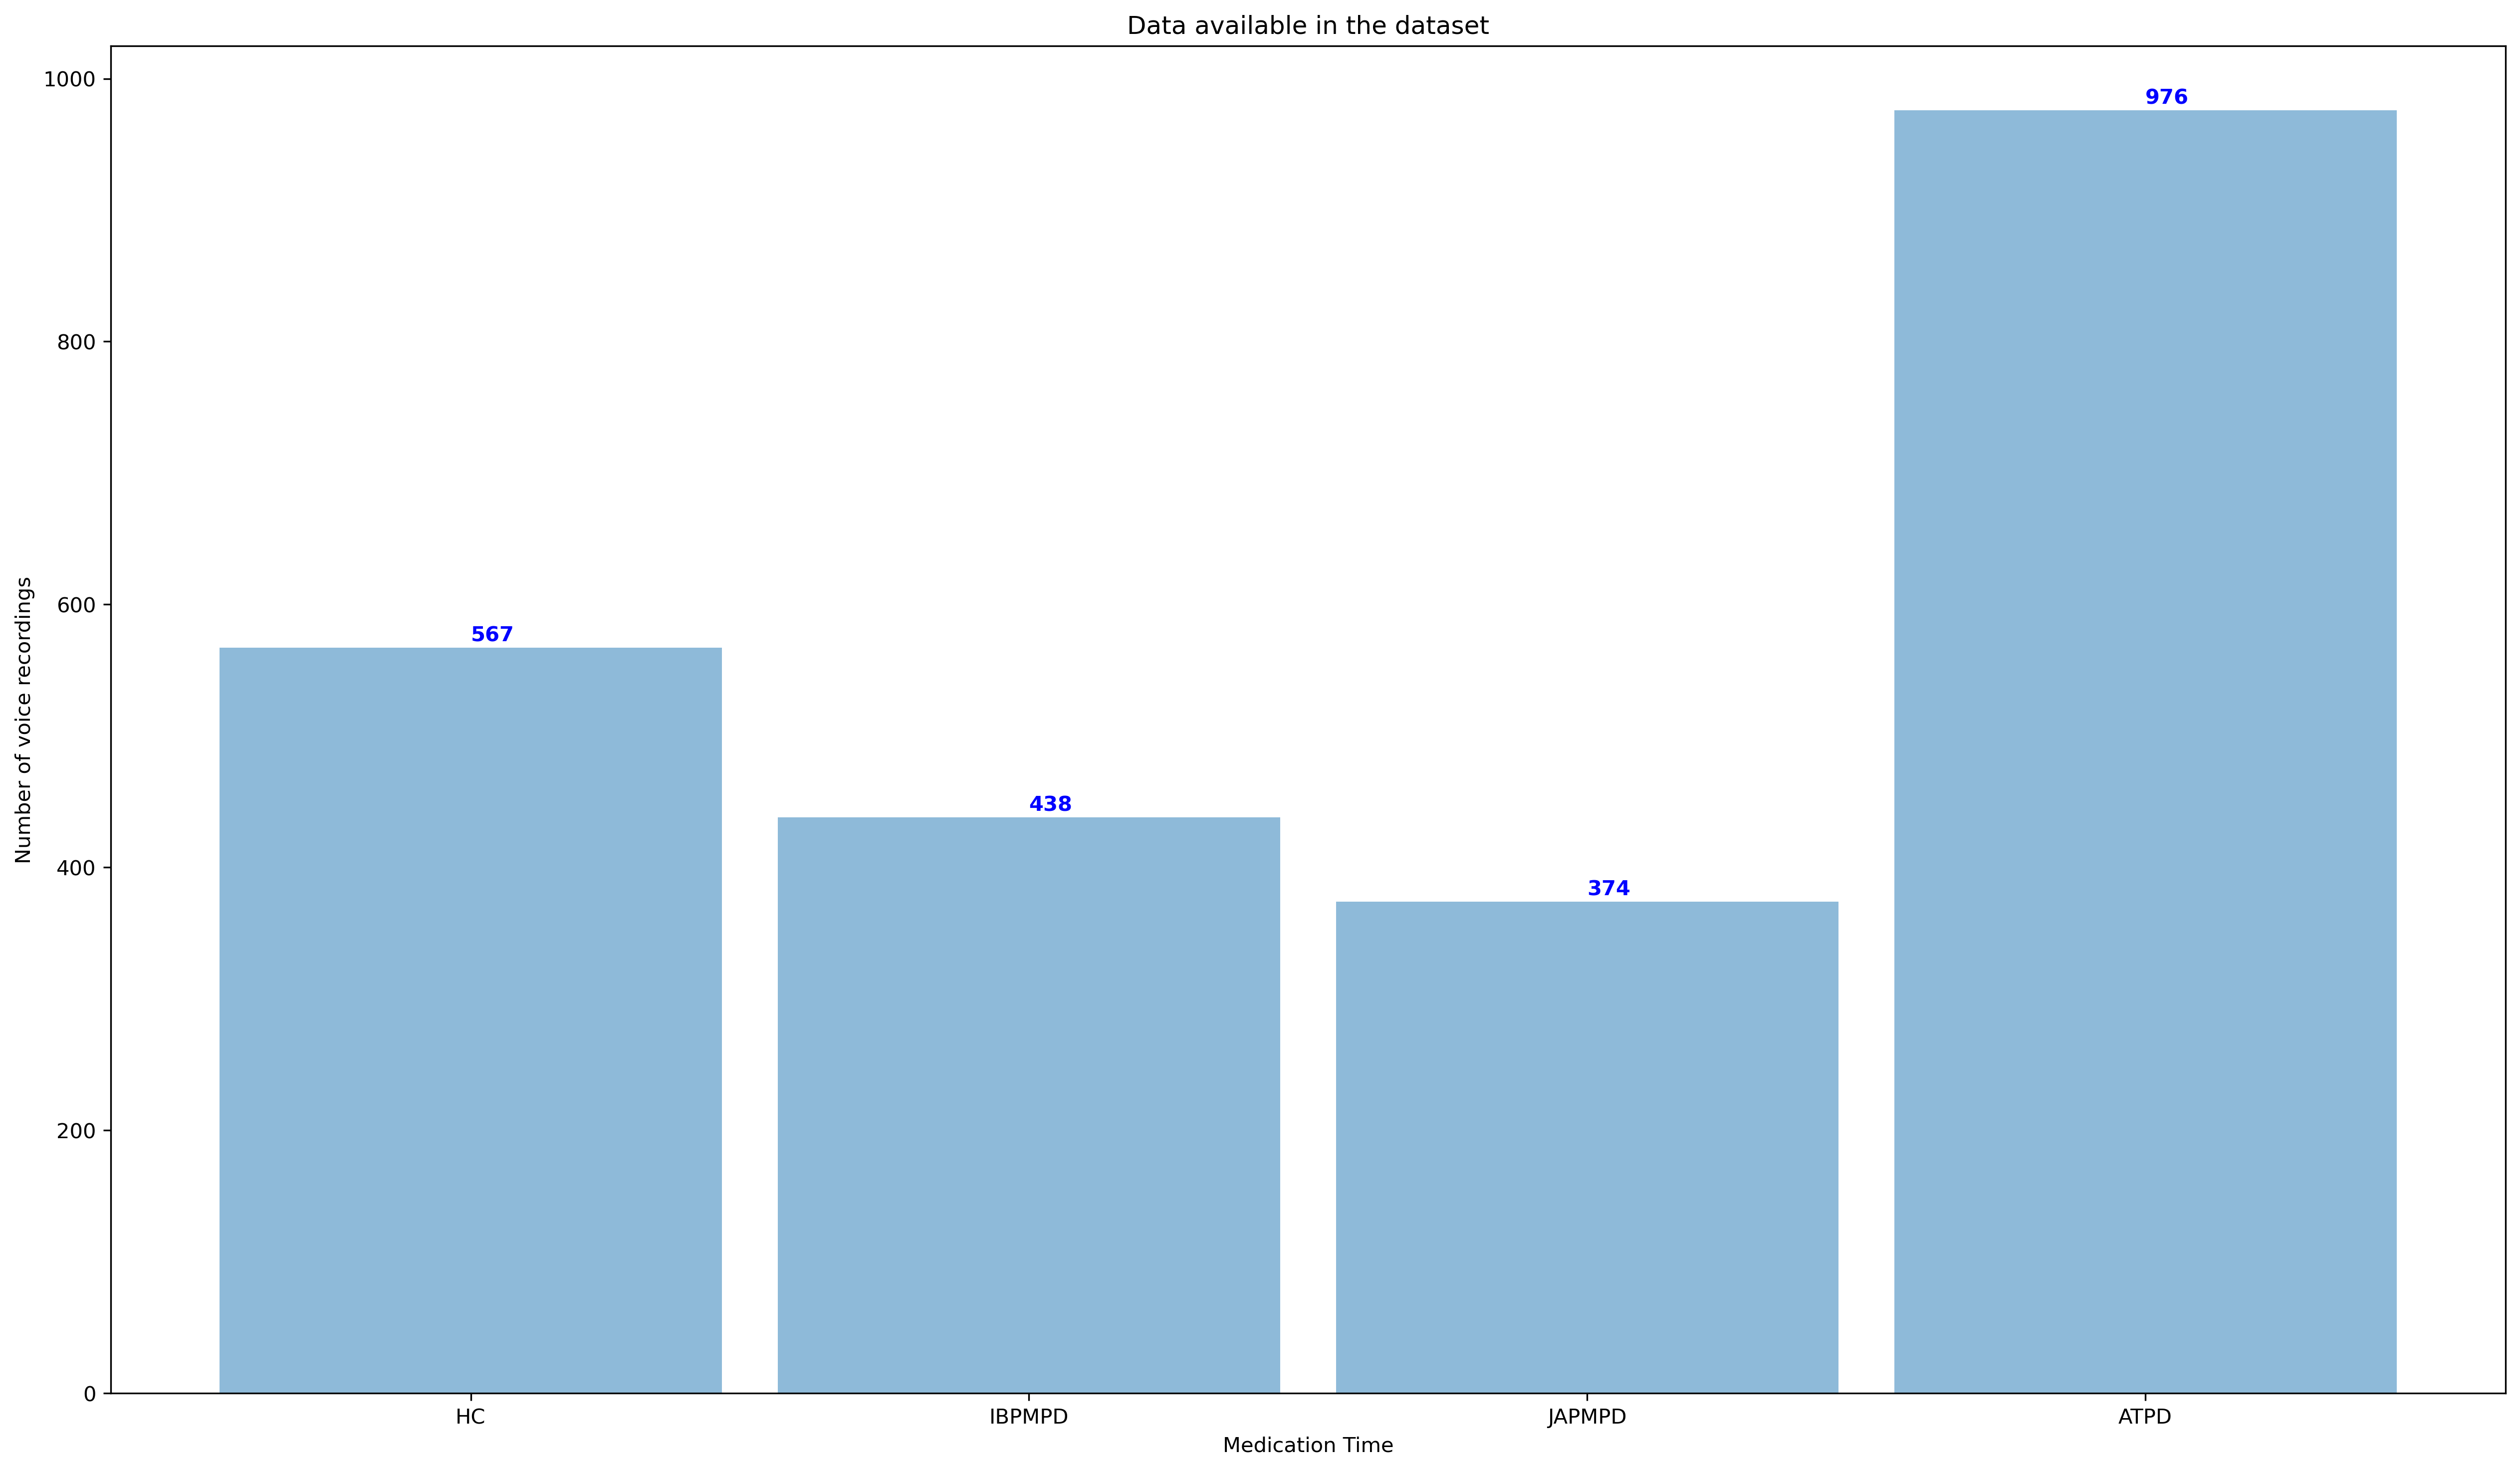

In [5]:
from matplotlib import pyplot as plt
labels = ['HC', 'IBPMPD','JAPMPD','ATPD']
values = [HC_cases, IBPMPD_cases, JAPMPD_cases, ATPD_cases]

fig = plt.figure(figsize=(16, 9), dpi=300)
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(labels, values ,align="center", width=0.9, alpha=0.5)
axes.set_xlabel('Medication Time')
axes.set_ylabel('Number of voice recordings')
axes.set_title("Data available in the dataset")
for i in range(len(values)):
    axes.text(i, values[i] + 5, values[i], color="blue", fontweight="bold")

The length of each recording is 10 seconds. We have segmented each file to 5 audio recording with 2 second length each. Then extracted voice impariment features and formants features for each of the segments. Here is the number of overall features we have:

In [6]:
print(f"Number of overall feature vectors to work with: {len(features_df) * 10}")

Number of overall feature vectors to work with: 23550


Now it is time to load the features and start analysing our data.

In [7]:
# Start iterating over the dataset
load_features = []
for _,row in features_df.iterrows():
    # Path for the features folder
    try:
        feature_folder_path = os.path.join(os.getcwd(),f"voice_features/{row['audio_audio']}")
    
        file_path = os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_0.npz")
        # Load the ten feature files extraced   5836266_s_f_0.npz
        s_f_0 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_0.npz"))['s_f']
        s_f_1 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_1.npz"))['s_f']
        s_f_2 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_2.npz"))['s_f']
        s_f_3 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_3.npz"))['s_f']
        s_f_4 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_4.npz"))['s_f']

        f0_0 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f00.npz"))['f0_f']
        f0_1 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f01.npz"))['f0_f']
        f0_2 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f02.npz"))['f0_f']
        f0_3 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f03.npz"))['f0_f']
        f0_4 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f04.npz"))['f0_f']

        # Build an array based on the features
        feature_data_record = [s_f_0,
                            s_f_1,
                            s_f_2,
                            s_f_3,
                            s_f_4,
                            f0_0,
                            f0_1,
                            f0_2,
                            f0_3,
                            f0_4,
                            row['medTimepoint']
                           ]
        load_features.append(feature_data_record)
        print(f"Features extracted for {row['audio_audio']}.")
    except Exception as ex:
        print("No feautre find for {row['audio_audio']}.")
    
# Genereate a new DataFrame based on the loaded feature vectors
extracted_features_df = pd.DataFrame(data=load_features, columns=["s_f_0",
                                                       "s_f_1",
                                                       "s_f_2",
                                                       "s_f_3",
                                                       "s_f_4",
                                                       "f0_0",
                                                       "f0_1",
                                                       "f0_2",
                                                       "f0_3",
                                                       "f0_4",
                                                       "label"])

Features extracted for 5836266.
Features extracted for 5836313.
Features extracted for 5832089.
Features extracted for 5837127.
Features extracted for 5831572.
Features extracted for 5859991.
Features extracted for 5869091.
Features extracted for 5873357.
Features extracted for 5879857.
Features extracted for 5892008.
Features extracted for 5894690.
Features extracted for 5904360.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
Features extracted for 5946950.
Features extracted for 5945634.
Features extracted for 5638293.
Features extracted for 5636947.
Features extracted for 5634728.
Features extracted for 5657335.
Features extracted for 5657316.
Features extracted for 5656623.
Features extracted for 5478801.
Features extracted for 5477807.
Features extracted for 5477809.
Features extracted for 5871861.
No feautre find for {row['audio_audio']}.
Features extracted for 5887013.
Features extracted for 5946263.
Features extracted for 5925353.
Features e

Features extracted for 5457171.
Features extracted for 5457331.
Features extracted for 5461393.
No feautre find for {row['audio_audio']}.
Features extracted for 5473266.
Features extracted for 5478019.
No feautre find for {row['audio_audio']}.
Features extracted for 5511444.
Features extracted for 5564653.
Features extracted for 5559156.
Features extracted for 5562947.
No feautre find for {row['audio_audio']}.
Features extracted for 5554252.
No feautre find for {row['audio_audio']}.
Features extracted for 5564047.
Features extracted for 5561151.
Features extracted for 5558794.
Features extracted for 5558501.
Features extracted for 5564600.
Features extracted for 5563494.
Features extracted for 5558881.
Features extracted for 5563734.
Features extracted for 5568646.
Features extracted for 5567708.
No feautre find for {row['audio_audio']}.
Features extracted for 5619357.
Features extracted for 5637137.
Features extracted for 5636559.
Features extracted for 5639629.
Features extracted for

Features extracted for 5823223.
Features extracted for 5816223.
Features extracted for 5821409.
Features extracted for 5835534.
No feautre find for {row['audio_audio']}.
Features extracted for 5836048.
Features extracted for 5848959.
Features extracted for 5854276.
Features extracted for 5857405.
Features extracted for 5878575.
Features extracted for 5869157.
Features extracted for 5873466.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
Features extracted for 5884403.
Features extracted for 5896938.
Features extracted for 5891492.
Features extracted for 5895869.
Features extracted for 5902752.
No feautre find for {row['audio_audio']}.
Features extracted for 5903065.
Features extracted for 5911152.
Features extracted for 5912023.
Features extracted for 5912635.
Features extracted for 5917789.
Features extracted for 5918385.
Features extracted for 5917433.
Features extracted for 5924591.
Features extracted for 5923974.
Features extracted for 5924045.


Features extracted for 5683339.
Features extracted for 5682250.
No feautre find for {row['audio_audio']}.
Features extracted for 5729582.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
Features extracted for 5719912.
Features extracted for 5721675.
Features extracted for 5733881.
Features extracted for 5740068.
No feautre find for {row['audio_audio']}.
Features extracted for 5746478.
No feautre find for {row['audio_audio']}.
Features extracted for 5757648.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
Features extracted for 5826972.
Features extracted for 5818158.
Features extracted for 5833999.
Features extracted for 58312

Features extracted for 5575902.
Features extracted for 5614770.
Features extracted for 5649427.
No feautre find for {row['audio_audio']}.
Features extracted for 5647941.
Features extracted for 5665567.
Features extracted for 5651927.
Features extracted for 5666451.
Features extracted for 5670987.
Features extracted for 5416338.
Features extracted for 5510665.
Features extracted for 5450886.
Features extracted for 5412990.
Features extracted for 5684833.
Features extracted for 5663878.
Features extracted for 5761775.
No feautre find for {row['audio_audio']}.
Features extracted for 5780893.
Features extracted for 5809370.
Features extracted for 5826159.
Features extracted for 5894353.
Features extracted for 5960408.
Features extracted for 5966906.
Features extracted for 5974527.
Features extracted for 5973630.
Features extracted for 5975381.
Features extracted for 5986924.
Features extracted for 5994350.
Features extracted for 5998999.
Features extracted for 6002852.
Features extracted f

Features extracted for 5993228.
Features extracted for 5993248.
Features extracted for 6001059.
Features extracted for 6006996.
No feautre find for {row['audio_audio']}.
Features extracted for 6011167.
Features extracted for 6016141.
No feautre find for {row['audio_audio']}.
Features extracted for 6018437.
Features extracted for 6018423.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
Features extracted for 6027403.
Features extracted for 6036350.
Features extracted for 6039029.
Features extracted for 6042450.
Features extracted for 6039412.
No feautre find for {row['audio_audio']}.
Features extracted for 6049725.
Features extracted for 6050700.
Features extracted for 6046889.
Features extracted for 6052164.
Features extracted for 6058259.
Features extracted for 6059048.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
Features extra

Features extracted for 5732572.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
Features extracted for 5427367.
No feautre find for {row['audio_audio']}.
Features extracted for 5437642.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
Features extracted for 5460965.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
Features extracted for 5467053.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
No feautre find for {row['audio_audio']}.
Features extracted for 6025553.
Features extracted for 6037735.
Features extracted for 6034437.
Features extracted for 6032915.
Features extracted for 6039569.
Features extracted for 6040863.
Features extracted for 6042585.
Features extracted for 6049113.
Features extracted for 6049600.
Features extracted for 6045820.
Features extract

Features extracted for 5668659.
Features extracted for 5596112.
Features extracted for 5519790.
Features extracted for 5673961.
Features extracted for 5809174.
Features extracted for 5502922.
Features extracted for 5512874.
Features extracted for 5565168.
No feautre find for {row['audio_audio']}.
Features extracted for 5553238.
Features extracted for 5423632.
Features extracted for 5833952.
Features extracted for 5840898.
Features extracted for 5884512.
Features extracted for 5904158.
Features extracted for 5918949.
Features extracted for 5907256.
Features extracted for 5932990.
Features extracted for 5927472.
No feautre find for {row['audio_audio']}.
Features extracted for 5960928.
Features extracted for 5962824.
Features extracted for 5966701.
Features extracted for 5967466.
Features extracted for 5976313.
Features extracted for 5988290.
Features extracted for 5984739.
Features extracted for 5997150.
Features extracted for 5990874.
Features extracted for 5993734.
Features extracted f

,s_f_0,s_f_1,s_f_2,s_f_3,s_f_4,f0_0,f0_1,f0_2,f0_3,f0_4,label
0,"[12.09828609302038, 10.012672132306363, 0.0635...","[0.17134445628816564, 0.18542777747778716, 0.0...","[0.7293158958267186, 0.7855938973670076, 0.003...","[1.7899901277950072, 1.8140701036777025, 0.012...","[0.12499717302380567, 0.13486923892282038, 0.0...","[60.85017568352953, 315.83403915171607, 245.94...","[91.2249272244996, 91.4887759748949, 91.647451...","[92.87314100385484, 92.76591169413092, 92.7123...","[90.96183939982812, 91.59452902702489, 92.1783...","[93.7896090152014, 94.06087556362874, 94.22401...",0
1,"[5.753542135682965, 4.763459881026899, 0.03188...","[0.16362231703710953, 0.15831475746571708, 0.0...","[0.2055567326614743, 0.1981746825511654, 0.001...","[0.2001202963258583, 0.19294817627138944, 0.00...","[0.14285285283656543, 0.13676848601585936, 0.0...","[211.03759079639664, 212.50547332303043, 80.19...","[103.52649238413771, 103.46671040458818, 103.4...","[102.21923267472074, 102.04225362734822, 101.9...","[99.65402628278676, 99.88454217380303, 99.9999...","[105.2144848200716, 105.33610359548358, 105.39...",0
2,"[3.560277702964505, 3.0842049304806234, 0.0206...","[0.12257707340409346, 0.11752831228199873, 0.0...","[0.8594357404264497, 0.8239416688720579, 0.003...","[0.29528628371439153, 0.284591957905354, 0.001...","[21.770833599259102, 17.10167006228366, 0.1133...","[141.09498071180485, 138.91156034232867, 137.7...","[103.40696294649298, 104.00599338884774, 104.4...","[101.80675811919156, 101.92443785950765, 101.9...","[101.98332873016439, 101.39594797900287, 101.0...","[104.18637828801137, 105.15372809940071, 105.5...",0
3,"[19.337739934540007, 9.709428110734779, 0.0648...","[0.27862366276395817, 0.12243309425039371, 0.0...","[0.659795747600094, 0.29064160301789366, 0.001...","[0.6529406427237515, 0.288192867867575, 0.0012...","[1.5945258488138199, 0.7034831862367401, 0.002...","[297.7634480288336, 321.16915274535035, 124.11...","[229.47441856935876, 230.80375035271106, 231.2...","[311.8459091114025, 227.36339464720268, 227.49...","[224.23321560570173, 225.92334171850038, 225.9...","[225.01169693776183, 225.27179085051273, 225.4...",1
4,"[6.102020280532837, 2.9642114767405343, 0.0193...","[0.2203407510728384, 0.10894497346353466, 0.00...","[0.2074388374346634, 0.10353107014492767, 0.00...","[0.2765777510440543, 0.13925736311879014, 0.00...","[0.2598553717585523, 0.13090584082319176, 0.00...","[61.23803942987186, 118.30409399489083, 251.25...","[200.69434970190036, 200.9263348804106, 201.04...","[198.84808476350935, 200.34687404693906, 200.5...","[199.3080525655734, 199.53843530540456, 199.65...","[198.04569392927505, 198.61849908740703, 198.6...",2
...,...,...,...,...,...,...,...,...,...,...,...
1723,"[9.130793784735477, 5.058512136759836, 0.03381...","[0.4231578592978454, 0.24123249162655533, 0.00...","[0.4661490227054915, 0.2671201225156876, 0.001...","[0.45421339488595747, 0.2604925604574023, 0.00...","[0.5719181417676275, 0.33042141464602554, 0.00...","[163.58041171155608, 155.56311190120184, 148.1...","[176.23494261933848, 176.54059925813087, 176.3...","[175.0175989490417, 175.52380022740775, 175.62...","[173.80866408570222, 174.71457918333877, 175.0...","[172.11028744886596, 174.31136877642828, 174.6...",1
1724,"[1.2632403128734218, 0.8455467907915402, 0.005...","[0.24665807470207782, 0.16213818267245025, 0.0...","[0.24921612866638485, 0.16415332790169507, 0.0...","[0.32278603043098203, 0.21388699628338342, 0.0...","[0.3171890498685261, 0.21196698217003976, 0.00...","[141.42135623730948, 109.99973132782154, 111.5...","[155.92295455570132, 156.19338268698863, 156.1...","[148.88172401441687, 149.91727829832973, 150.4...","[145.9863350884927, 147.17167156256156, 147.59...","[147.6826145939499, 149.13994004503772, 149.48...",2
1725,"[35.50774507667717, 22.43931517312956, 0.14910...","[0.24485511253387643, 0.1528249212003611, 0.00...","[0.20781510358434602, 0.12920428010285742, 0.0...","[0.39011293776499767, 0.23912241015326502, 0.0...","[0

The number of processable data records changed after loading the features. We need to repreat our analysis to see how many data records we have for each group.

1. We have 1728 data records to be envolved in the data analysis process.
2. Health Control cases: 432
3. Immediately before Parkinson medication PD cases: 303
4. Just after Parkinson medication PD cases: 303
5. Another Time PD cases: 690


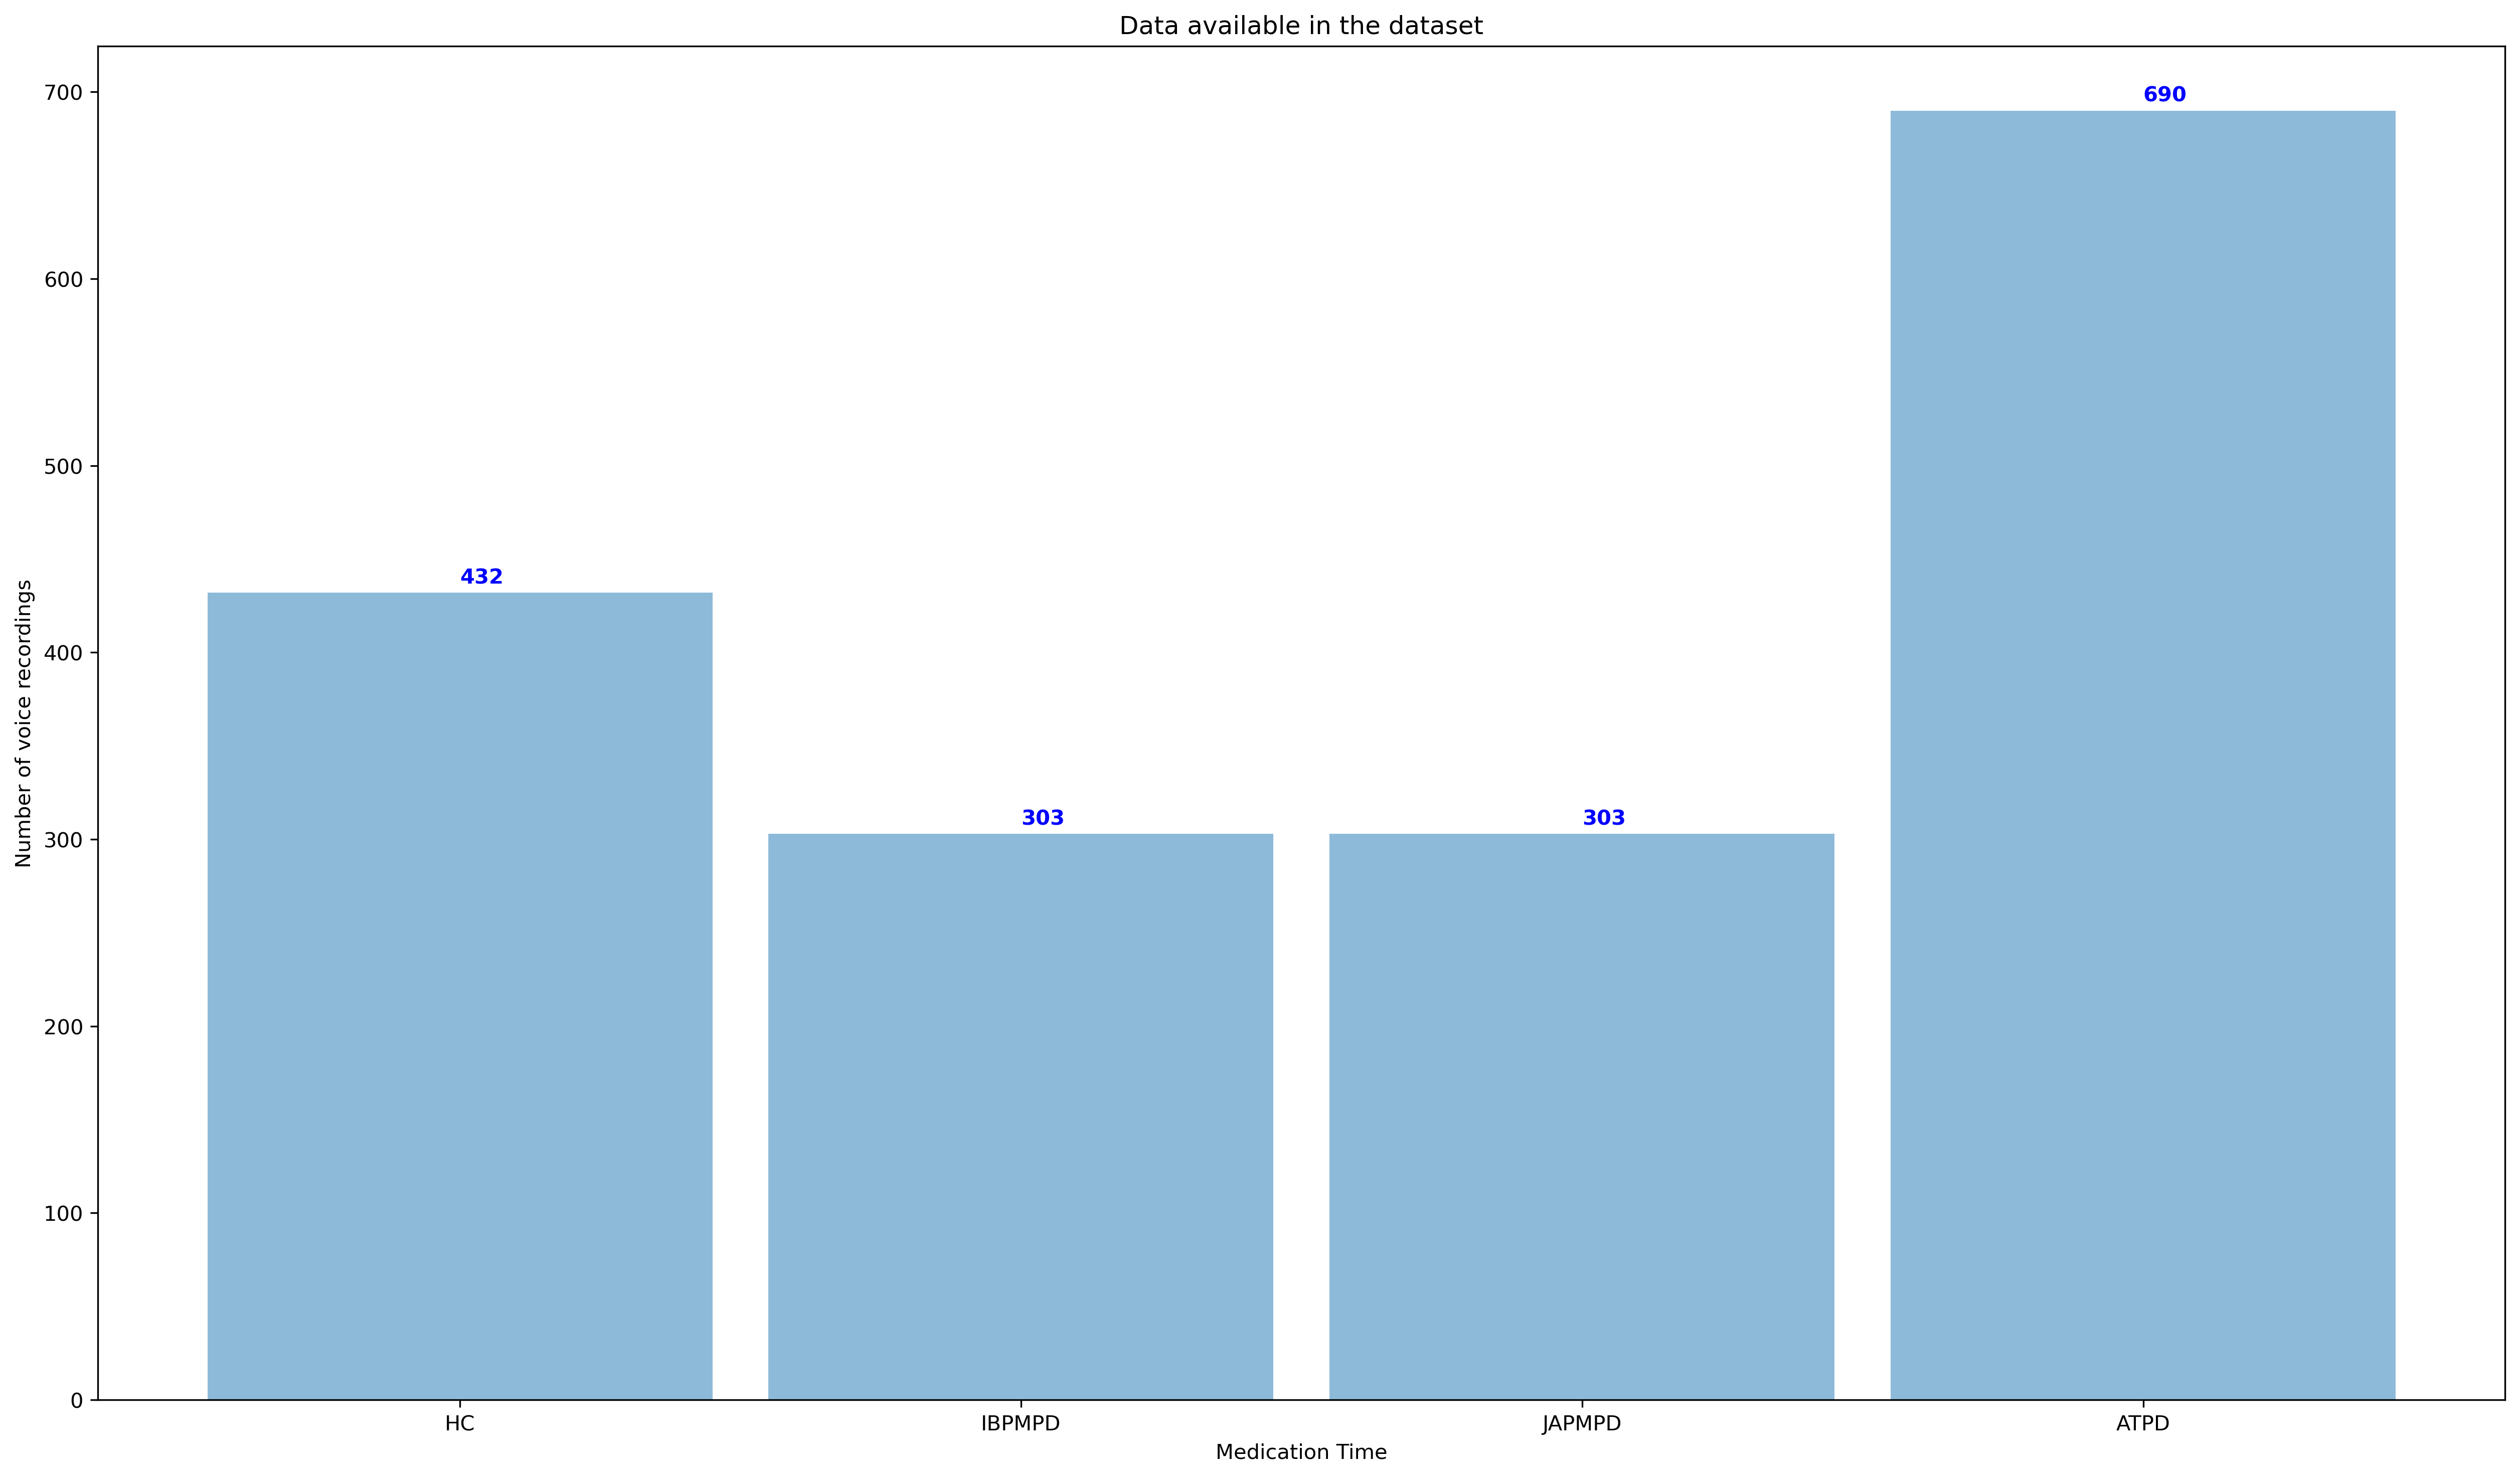

In [9]:
HC_cases = len(pd.DataFrame(extracted_features_df[extracted_features_df['label']==0]))
IBPMPD_cases = len(pd.DataFrame(extracted_features_df[extracted_features_df['label']==1]))
JAPMPD_cases = len(pd.DataFrame(extracted_features_df[extracted_features_df['label']==2]))
ATPD_cases = len(pd.DataFrame(extracted_features_df[extracted_features_df['label']==3]))

# Now lets check how many record we have for each group.
print(f"1. We have {len(extracted_features_df)} data records to be envolved in the data analysis process.")
print(f"2. Health Control cases: {HC_cases}")
print(f"3. Immediately before Parkinson medication PD cases: {IBPMPD_cases}")
print(f"4. Just after Parkinson medication PD cases: {JAPMPD_cases}")
print(f"5. Another Time PD cases: {ATPD_cases}")

labels = ['HC', 'IBPMPD','JAPMPD','ATPD']
values = [HC_cases, IBPMPD_cases, JAPMPD_cases, ATPD_cases]

fig = plt.figure(figsize=(16, 9), dpi=300)
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(labels, values ,align="center", width=0.9, alpha=0.5)
axes.set_xlabel('Medication Time')
axes.set_ylabel('Number of voice recordings')
axes.set_title("Data available in the dataset")
for i in range(len(values)):
    axes.text(i, values[i] + 5, values[i], color="blue", fontweight="bold")

Our observation showed that while most of the cased perform very well in the first few seconds. Based on the severity of their status they voice production process became problematic toward the end. Therefore, even though it is recommended in the lituratures to use the voice recored from seconds two to four; But we intented to use all the segements seperately and repeat our experiments for all of them. Thereupon, this is what we are going to do:

## Feature reduction/Feature Selection

We have heuge number of features _309 imperiment features and 309 f0 feautres for each subject and each segement_ for this experiment. Thus, we need to do feature reduction/feature selection to be able to visualize each data sample. We are intented to use `PCA`, `LDA` and `t-SNE` for this purpose.

## Visualization based on different classes

We beilive basded on the contaniume nature of PD progress. It should be possible to have more than two classes and even more that 5 classes according to the MDS-UPDRS measurement. Thereupon, we will try to visualize each class first. This will be repeated for all of five seperated segments for all the subjects in a group to see what is the difference between the result of visualization in different parts of the recording. This will help us to descide about what we are going to do next. 